In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df[housing.target_names[0]]=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


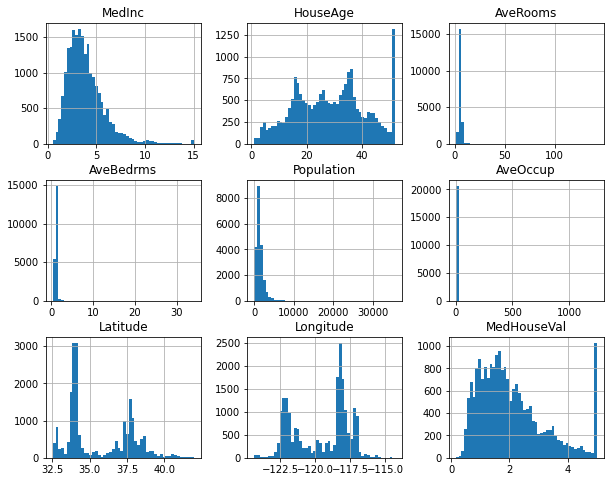

In [23]:
H=df.hist(bins=50,figsize=(10,8))

In [24]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Estandarización
$$
Z=\frac{X-\bar{x}}{\sigma},
$$
donde $\bar{x}$ es la media aritmética del conjunto $X$ y $\sigma$ es su desviasión estándar.

In [25]:
X=df.drop(columns='MedHouseVal') # Eliminamos el target
me=np.mean(X)
std=np.std(X)

In [26]:
me

MedInc           3.870671
HouseAge        28.639486
AveRooms         5.429000
AveBedrms        1.096675
Population    1425.476744
AveOccup         3.070655
Latitude        35.631861
Longitude     -119.569704
dtype: float64

In [27]:
std

MedInc           1.899776
HouseAge        12.585253
AveRooms         2.474113
AveBedrms        0.473899
Population    1132.434688
AveOccup        10.385798
Latitude         2.135901
Longitude        2.003483
dtype: float64

In [28]:
Z1=(X-me)/std

In [29]:
Z1.mean()

MedInc       -2.522018e-14
HouseAge      5.878911e-16
AveRooms      4.640911e-15
AveBedrms     5.519526e-15
Population   -7.506747e-17
AveOccup     -7.361326e-16
Latitude     -8.068474e-14
Longitude    -1.426325e-12
dtype: float64

In [30]:
Z1.std()

MedInc        1.000024
HouseAge      1.000024
AveRooms      1.000024
AveBedrms     1.000024
Population    1.000024
AveOccup      1.000024
Latitude      1.000024
Longitude     1.000024
dtype: float64

In [31]:
Z1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-2.522018e-14,5.878911e-16,4.640911e-15,5.519526e-15,-7.506747e-17,-7.361326e-16,-8.068474e-14,-1.426325e-12
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


* Otra forma de calcularlo:

función `zscore` de `scipy.stats`

In [32]:
from scipy.stats import zscore

In [33]:
Z2=zscore(X) # Regresa un arreglo de numpy

In [34]:
Z2.mean(axis=0) # promediando por filas

array([ 6.60969987e-17,  5.50808322e-18,  6.60969987e-17, -1.06030602e-16,
       -1.10161664e-17,  3.44255201e-18, -1.07958431e-15, -8.52651283e-15])

In [35]:
Z2.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

* Una forma más de hacerlo:

clase `StandardScaler` de `sklearn.preprocessing`

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
est=StandardScaler()
Z3=est.fit_transform(X) # Regresa un arreglo de numpy

In [38]:
Z3.mean(axis=0)

array([ 6.60969987e-17,  5.50808322e-18,  6.60969987e-17, -1.06030602e-16,
       -1.10161664e-17,  3.44255201e-18, -1.07958431e-15, -8.52651283e-15])

In [39]:
Z3.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

# Regresión lineal

In [48]:
# Entrenamos los datos sin normalizar
lin=LinearRegression()
lin.fit(X,df['MedHouseVal'])

LinearRegression()

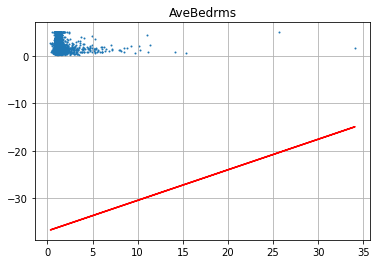

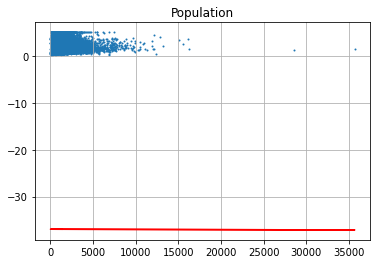

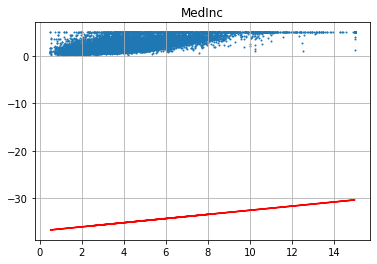

In [42]:
# Escogemos tres variables independientes para graficar el aporte a la salida
# variable más pequeña: AveBedrms    [3]
# variable más grande:  Population   [4]
# otra:                 MedInc	     [0]
for i in [3,4,0]:
  plt.figure()
  x=X.iloc[:,i]
  plt.scatter(x,df.MedHouseVal,s=1)
  y=lin.intercept_+lin.coef_[i]*x
  plt.plot(x,y,'r')
  plt.title(df.columns[i])
  plt.grid()

In [43]:
lin.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [49]:
# Acotación #
lin.score(X,df.MedHouseVal)

0.606232685199805

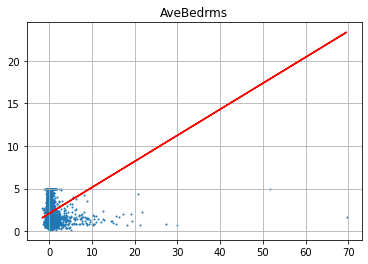

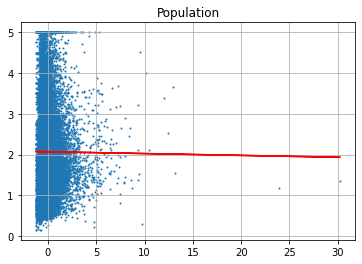

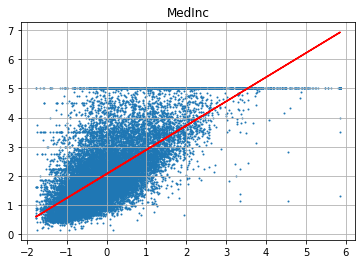

In [45]:
# Regresión lineal de los datos normalizados
lin.fit(Z3,df.MedHouseVal)

for i in [3,4,0]:
  x=Z3[:,i]
  y=lin.intercept_+lin.coef_[i]*x

  plt.figure()
  plt.scatter(x,df.MedHouseVal,s=1)
  plt.plot(x,y,'r')
  plt.title(df.columns[i])
  plt.grid()

In [46]:
lin.coef_

array([ 0.8296193 ,  0.11875165, -0.26552688,  0.30569623, -0.004503  ,
       -0.03932627, -0.89988565, -0.870541  ])

In [47]:
# Acotación #
lin.score(Z3,df.MedHouseVal)

0.606232685199805

In [50]:
# La normalización se puede especificar al declarar la variable 'lin' (hasta la versión 1.0)
LinearRegression?